<a href="https://colab.research.google.com/github/Hiranmai-T/EVA/blob/master/S7/S7_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [3]:
from dataloader import dataloader
#dataloader.py has dataloader method which defines the transformtions and also load the dataset needed
trainset,trainloader,testset,testloader = dataloader(dataset="cifar10",mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5), bs=4,
                                           nw=2,use_cuda=True)
#mean and std for transformations. bs = batch_size, nw = no_of_workers 

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.



torch.Size([3, 32, 32])
plane  ship truck  frog


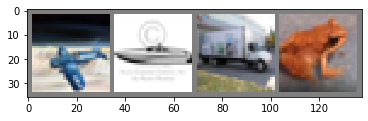

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    #Tensor.cpu()
    img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images[0].shape)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2. **Define a Convolution Neural Network**

Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [5]:
!pip install torchsummary
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F
from model2 import initiate_model
model = initiate_model() #returns model with all the channels defined
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 24, 24]          18,432
              ReLU-6           [-1, 64, 24, 24]               0
       BatchNorm2d-7           [-1, 64, 24, 24]             128
           Dropout-8           [-1, 64, 24, 24]               0
         MaxPool2d-9           [-1, 64, 12, 12]               0
           Conv2d-10          [-1, 128, 12, 12]          36,864
             ReLU-11          [-1, 128, 12, 12]               0
      BatchNorm2d-12          [-1, 128, 12, 12]             256
          Dropout-13          [-1, 128, 12, 12]               0
           Conv2d-14           [-1, 64,

3. **Define a Loss function and optimizer**

Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [0]:
from train_test import train,test
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

4. **Train and Test the network** 

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize...



In [8]:
EPOCHS = 50
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    # scheduler.step()
    test(model, device, testloader)

  0%|          | 0/12500 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.9553799629211426 Batch_id=12499 Accuracy=45.30: 100%|██████████| 12500/12500 [01:55<00:00, 108.07it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.4679, Accuracy: 5321/10000 (53.21%)

EPOCH: 1


Loss=1.6963998079299927 Batch_id=12499 Accuracy=56.61: 100%|██████████| 12500/12500 [01:55<00:00, 108.18it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.4034, Accuracy: 5966/10000 (59.66%)

EPOCH: 2


Loss=2.141896963119507 Batch_id=12499 Accuracy=60.94: 100%|██████████| 12500/12500 [01:55<00:00, 108.47it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.3747, Accuracy: 6253/10000 (62.53%)

EPOCH: 3


Loss=1.3438788652420044 Batch_id=12499 Accuracy=64.90: 100%|██████████| 12500/12500 [01:55<00:00, 108.39it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.3445, Accuracy: 6555/10000 (65.55%)

EPOCH: 4


Loss=0.42579594254493713 Batch_id=12499 Accuracy=67.02: 100%|██████████| 12500/12500 [01:55<00:00, 108.17it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.3353, Accuracy: 6647/10000 (66.47%)

EPOCH: 5


Loss=0.9640254378318787 Batch_id=12499 Accuracy=69.17: 100%|██████████| 12500/12500 [01:56<00:00, 107.71it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.3404, Accuracy: 6596/10000 (65.96%)

EPOCH: 6


Loss=0.6508973240852356 Batch_id=12499 Accuracy=71.03: 100%|██████████| 12500/12500 [01:55<00:00, 108.21it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.3280, Accuracy: 6720/10000 (67.20%)

EPOCH: 7


Loss=0.47116971015930176 Batch_id=12499 Accuracy=72.02: 100%|██████████| 12500/12500 [01:55<00:00, 108.23it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.3057, Accuracy: 6943/10000 (69.43%)

EPOCH: 8


Loss=0.3969659209251404 Batch_id=12499 Accuracy=72.96: 100%|██████████| 12500/12500 [01:54<00:00, 108.71it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.3099, Accuracy: 6901/10000 (69.01%)

EPOCH: 9


Loss=0.7617626190185547 Batch_id=12499 Accuracy=73.80: 100%|██████████| 12500/12500 [01:55<00:00, 108.13it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2996, Accuracy: 7004/10000 (70.04%)

EPOCH: 10


Loss=0.4780879616737366 Batch_id=12499 Accuracy=74.62: 100%|██████████| 12500/12500 [01:55<00:00, 108.49it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2904, Accuracy: 7096/10000 (70.96%)

EPOCH: 11


Loss=0.7871376872062683 Batch_id=12499 Accuracy=75.59: 100%|██████████| 12500/12500 [01:54<00:00, 108.74it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.3029, Accuracy: 6971/10000 (69.71%)

EPOCH: 12


Loss=0.733571469783783 Batch_id=12499 Accuracy=76.21: 100%|██████████| 12500/12500 [01:56<00:00, 107.42it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2946, Accuracy: 7054/10000 (70.54%)

EPOCH: 13


Loss=0.9347314834594727 Batch_id=12499 Accuracy=76.60: 100%|██████████| 12500/12500 [01:55<00:00, 108.09it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2941, Accuracy: 7059/10000 (70.59%)

EPOCH: 14


Loss=1.3118540048599243 Batch_id=12499 Accuracy=77.41: 100%|██████████| 12500/12500 [01:55<00:00, 107.90it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2852, Accuracy: 7148/10000 (71.48%)

EPOCH: 15


Loss=0.4044226408004761 Batch_id=12499 Accuracy=78.07: 100%|██████████| 12500/12500 [01:55<00:00, 107.96it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2808, Accuracy: 7192/10000 (71.92%)

EPOCH: 16


Loss=0.34429746866226196 Batch_id=12499 Accuracy=78.40: 100%|██████████| 12500/12500 [01:56<00:00, 107.12it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2668, Accuracy: 7332/10000 (73.32%)

EPOCH: 17


Loss=1.4686015844345093 Batch_id=12499 Accuracy=78.93: 100%|██████████| 12500/12500 [01:56<00:00, 107.02it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2784, Accuracy: 7216/10000 (72.16%)

EPOCH: 18


Loss=0.7041420936584473 Batch_id=12499 Accuracy=79.18: 100%|██████████| 12500/12500 [01:55<00:00, 108.40it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2678, Accuracy: 7322/10000 (73.22%)

EPOCH: 19


Loss=0.46316733956336975 Batch_id=12499 Accuracy=79.64: 100%|██████████| 12500/12500 [01:56<00:00, 107.62it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2685, Accuracy: 7315/10000 (73.15%)

EPOCH: 20


Loss=0.6154664754867554 Batch_id=12499 Accuracy=80.02: 100%|██████████| 12500/12500 [01:55<00:00, 108.54it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2632, Accuracy: 7368/10000 (73.68%)

EPOCH: 21


Loss=0.8798267841339111 Batch_id=12499 Accuracy=80.22: 100%|██████████| 12500/12500 [01:55<00:00, 108.69it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2753, Accuracy: 7247/10000 (72.47%)

EPOCH: 22


Loss=0.03658173605799675 Batch_id=12499 Accuracy=80.81: 100%|██████████| 12500/12500 [01:55<00:00, 108.09it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2720, Accuracy: 7280/10000 (72.80%)

EPOCH: 23


Loss=0.26351431012153625 Batch_id=12499 Accuracy=81.10: 100%|██████████| 12500/12500 [01:54<00:00, 108.91it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2631, Accuracy: 7369/10000 (73.69%)

EPOCH: 24


Loss=0.7107751369476318 Batch_id=12499 Accuracy=81.19: 100%|██████████| 12500/12500 [01:55<00:00, 108.25it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2665, Accuracy: 7335/10000 (73.35%)

EPOCH: 25


Loss=0.669184684753418 Batch_id=12499 Accuracy=81.57: 100%|██████████| 12500/12500 [01:56<00:00, 107.02it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2587, Accuracy: 7413/10000 (74.13%)

EPOCH: 26


Loss=0.5714967846870422 Batch_id=12499 Accuracy=81.84: 100%|██████████| 12500/12500 [01:55<00:00, 107.99it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2605, Accuracy: 7395/10000 (73.95%)

EPOCH: 27


Loss=0.6295639276504517 Batch_id=12499 Accuracy=82.26: 100%|██████████| 12500/12500 [01:56<00:00, 107.74it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2625, Accuracy: 7375/10000 (73.75%)

EPOCH: 28


Loss=0.7261045575141907 Batch_id=12499 Accuracy=82.17: 100%|██████████| 12500/12500 [01:55<00:00, 107.86it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2586, Accuracy: 7414/10000 (74.14%)

EPOCH: 29


Loss=0.3115461468696594 Batch_id=12499 Accuracy=82.51: 100%|██████████| 12500/12500 [01:55<00:00, 107.95it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2629, Accuracy: 7371/10000 (73.71%)

EPOCH: 30


Loss=1.894353985786438 Batch_id=12499 Accuracy=82.74: 100%|██████████| 12500/12500 [01:57<00:00, 106.75it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2647, Accuracy: 7353/10000 (73.53%)

EPOCH: 31


Loss=1.0158209800720215 Batch_id=12499 Accuracy=82.97: 100%|██████████| 12500/12500 [01:55<00:00, 107.79it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2710, Accuracy: 7290/10000 (72.90%)

EPOCH: 32


Loss=0.08009141683578491 Batch_id=12499 Accuracy=83.20: 100%|██████████| 12500/12500 [01:56<00:00, 107.39it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2628, Accuracy: 7372/10000 (73.72%)

EPOCH: 33


Loss=0.5477630496025085 Batch_id=12499 Accuracy=83.54: 100%|██████████| 12500/12500 [01:55<00:00, 108.28it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2703, Accuracy: 7297/10000 (72.97%)

EPOCH: 34


Loss=0.11709010601043701 Batch_id=12499 Accuracy=83.71: 100%|██████████| 12500/12500 [01:55<00:00, 108.21it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.2584, Accuracy: 7416/10000 (74.16%)

EPOCH: 35


Loss=0.6508391499519348 Batch_id=6886 Accuracy=83.97:  55%|█████▌    | 6876/12500 [01:04<00:51, 110.04it/s] Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)

RuntimeError: ignored

In [9]:
from train_test2 import train,test

ImportError: ignored

In [0]:
#Training the model(Different alternative)
train(model, device, trainloader, optimizer, 50,criterion)

In [0]:
#Testing the model(Different alternative)
test(model, device, testloader) #Acheives an accuracy of 71%

GroundTruth:    cat  ship  ship plane


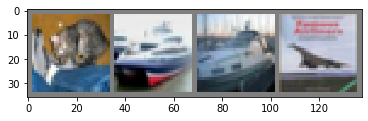

In [10]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images.to(device)))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j].to(device)] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = model(images.to(device))

In [12]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog   car  ship plane


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels.to(device)).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 80 %
Accuracy of   car : 87 %
Accuracy of  bird : 65 %
Accuracy of   cat : 46 %
Accuracy of  deer : 68 %
Accuracy of   dog : 64 %
Accuracy of  frog : 75 %
Accuracy of horse : 76 %
Accuracy of  ship : 75 %
Accuracy of truck : 78 %
